In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\jason wang\AppData\Local\Temp\ipykernel_12136\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dff = pd.read_csv("DFF.csv")
dff['DATE'] = pd.to_datetime(dff['DATE'])
dff

,DATE,DFF
0,2004-08-01,1.429355
1,2004-09-01,1.605000
2,2004-10-01,1.760968
3,2004-11-01,1.932000
4,2004-12-01,2.156129
...,...,...
236,2024-04-01,5.330000
237,2024-05-01,5.330000
238,2024-06-01,5.330000
239,2024-07-01,5.330000


In [3]:
import yfinance as yf
gold = yf.download('GC=F', start='2004-07-31', end='2024-08-27', interval='1mo')
gold

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-01,407.299988,418.799988,396.799988,418.700012,418.700012,16144
2004-10-01,419.100006,430.000000,410.299988,428.500000,428.500000,2646
2004-11-01,427.299988,454.799988,424.600006,451.299988,451.299988,183608
2004-12-01,451.600006,456.500000,432.600006,437.500000,437.500000,12728
2005-01-01,431.000000,431.000000,418.700012,421.799988,421.799988,115342
...,...,...,...,...,...,...
2024-04-01,2235.699951,2429.000000,2230.000000,2291.399902,2291.399902,8117
2024-05-01,2287.699951,2435.800049,2277.600098,2322.899902,2322.899902,154217
2024-06-01,2322.600098,2385.100098,2285.399902,2327.699951,2327.699951,7958


In [4]:
gold['Return'] = np.append(np.nan, np.diff(gold['Close'])/gold['Close'][:-1])
gold.reset_index(inplace=True)
gold.rename(columns={'Date':'DATE'},inplace=True)
gold_r = gold[['DATE','Close','Return']]
gold_r

,DATE,Close,Return
0,2004-09-01,418.700012,NaN
1,2004-10-01,428.500000,0.023406
2,2004-11-01,451.299988,0.053209
3,2004-12-01,437.500000,-0.030578
4,2005-01-01,421.799988,-0.035886
...,...,...,...
202,2024-04-01,2291.399902,0.033372
203,2024-05-01,2322.899902,0.013747
204,2024-06-01,2327.699951,0.002066
205,2024-07-01,2426.500000,0.042445


In [5]:
df = pd.merge(dff, gold_r, on='DATE', how='right')
df.dropna(inplace=True)
df.to_csv('Fed rate vs Gold.csv')
df

,DATE,DFF,Close,Return
1,2004-10-01,1.760968,428.500000,0.023406
2,2004-11-01,1.932000,451.299988,0.053209
3,2004-12-01,2.156129,437.500000,-0.030578
4,2005-01-01,2.279355,421.799988,-0.035886
5,2005-02-01,2.501786,436.500000,0.034851
...,...,...,...,...
202,2024-04-01,5.330000,2291.399902,0.033372
203,2024-05-01,5.330000,2322.899902,0.013747
204,2024-06-01,5.330000,2327.699951,0.002066
205,2024-07-01,5.330000,2426.500000,0.042445


In [6]:
df = pd.read_csv('Fed rate vs Gold.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df

,Unnamed: 0,DATE,DFF,Close,Return
0,1,2004-10-01,1.760968,428.500000,0.023406
1,2,2004-11-01,1.932000,451.299988,0.053209
2,3,2004-12-01,2.156129,437.500000,-0.030578
3,4,2005-01-01,2.279355,421.799988,-0.035886
4,5,2005-02-01,2.501786,436.500000,0.034851
...,...,...,...,...,...
201,202,2024-04-01,5.330000,2291.399902,0.033372
202,203,2024-05-01,5.330000,2322.899902,0.013747
203,204,2024-06-01,5.330000,2327.699951,0.002066
204,205,2024-07-01,5.330000,2426.500000,0.042445


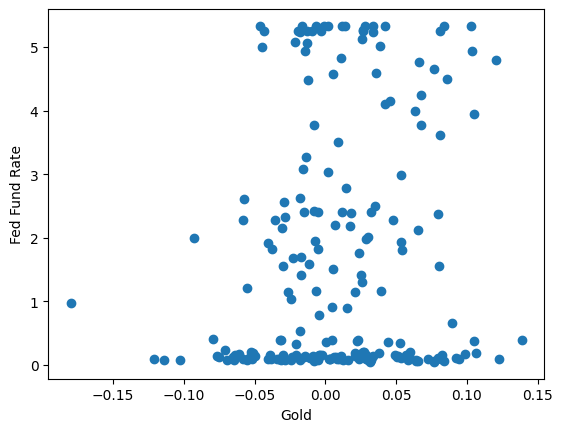

In [7]:
plt.xlabel('Gold')
plt.ylabel('Fed Fund Rate')
plt.scatter(df['Return'],df['DFF'])
plt.savefig('Fed Fund Rate and Gold Price.png')

In [8]:
df[df['Return'] < -0.15]

,Unnamed: 0,DATE,DFF,Close,Return
42,43,2008-10-01,0.969355,716.799988,-0.18005


In [9]:
df.drop(df[df['Return'] < -0.15].index, inplace=True)

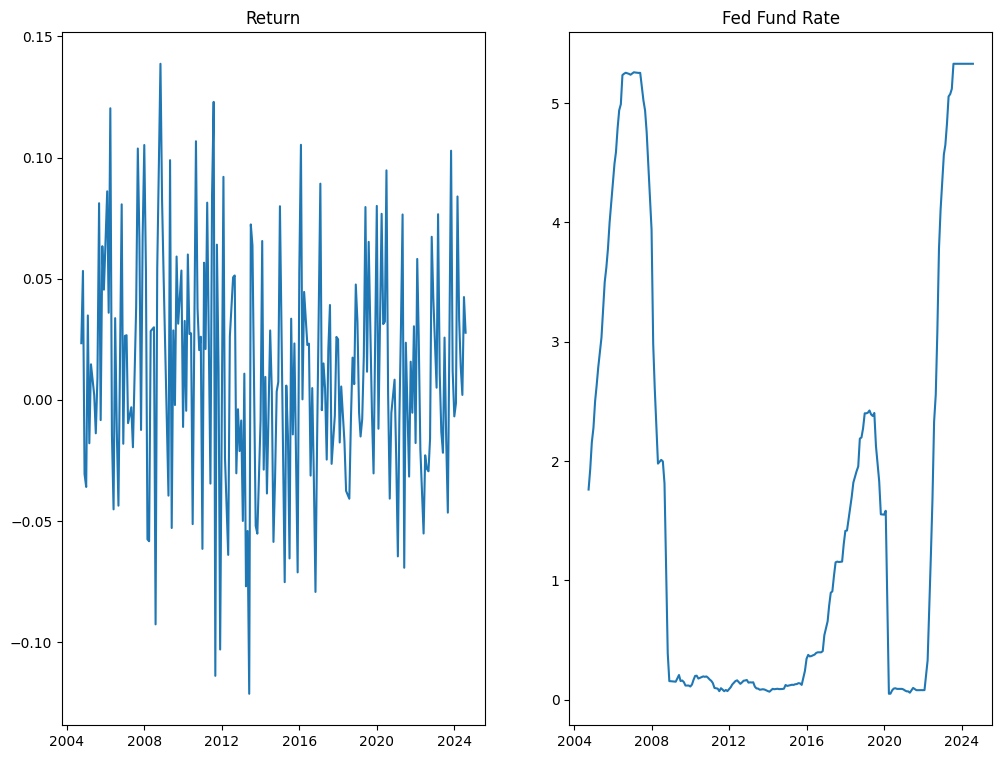

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,9))
ax1.plot(df['DATE'], df['Return'])
ax1.set_title('Return')
ax2.plot(df['DATE'], df['DFF'])
ax2.set_title('Fed Fund Rate')
plt.savefig('Return vs DFF.png')

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
def ad_full(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    print(dfoutput)
ad_full(df['Return'])
ad_full(df['DFF'])

Test Statistic                -1.455304e+01
p-value                        4.931420e-27
Lags Used                      0.000000e+00
Number of Observations Used    2.040000e+02
dtype: float64
Test Statistic                  -2.436497
p-value                          0.131699
Lags Used                        5.000000
Number of Observations Used    199.000000
dtype: float64


In [12]:
dff['DFF_diff'] = np.append(np.nan, np.diff(dff['DFF']))
df = pd.merge(df, dff, on=['DATE','DFF'], how='left')
df

,Unnamed: 0,DATE,DFF,Close,Return,DFF_diff
0,1,2004-10-01,1.760968,428.500000,0.023406,0.155968
1,2,2004-11-01,1.932000,451.299988,0.053209,0.171032
2,3,2004-12-01,2.156129,437.500000,-0.030578,0.224129
3,4,2005-01-01,2.279355,421.799988,-0.035886,0.123226
4,5,2005-02-01,2.501786,436.500000,0.034851,0.222431
...,...,...,...,...,...,...
200,202,2024-04-01,5.330000,2291.399902,0.033372,0.000000
201,203,2024-05-01,5.330000,2322.899902,0.013747,0.000000
202,204,2024-06-01,5.330000,2327.699951,0.002066,0.000000
203,205,2024-07-01,5.330000,2426.500000,0.042445,0.000000


In [13]:
ad_full(df['DFF_diff'])

Test Statistic                  -3.569161
p-value                          0.006379
Lags Used                        2.000000
Number of Observations Used    202.000000
dtype: float64


In [14]:
df.to_csv('Interest Rate Change & Gold Price.csv')
df = pd.read_csv('Interest Rate Change & Gold Price.csv')
df

,Unnamed: 0.1,Unnamed: 0,DATE,DFF,Close,Return,DFF_diff
0,0,1,2004-10-01,1.760968,428.500000,0.023406,0.155968
1,1,2,2004-11-01,1.932000,451.299988,0.053209,0.171032
2,2,3,2004-12-01,2.156129,437.500000,-0.030578,0.224129
3,3,4,2005-01-01,2.279355,421.799988,-0.035886,0.123226
4,4,5,2005-02-01,2.501786,436.500000,0.034851,0.222431
...,...,...,...,...,...,...,...
200,200,202,2024-04-01,5.330000,2291.399902,0.033372,0.000000
201,201,203,2024-05-01,5.330000,2322.899902,0.013747,0.000000
202,202,204,2024-06-01,5.330000,2327.699951,0.002066,0.000000
203,203,205,2024-07-01,5.330000,2426.500000,0.042445,0.000000


In [15]:
import statsmodels.formula.api as smf
reg = smf.ols(formula='Return ~ DFF_diff', data=df)
result_slr=reg.fit()
result_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.428
Date:                Wed, 04 Sep 2024   Prob (F-statistic):             0.0655
Time:                        15:15:45   Log-Likelihood:                 332.69
No. Observations:                 205   AIC:                            -661.4
Df Residuals:                     203   BIC:                            -654.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0116      0.003      3.448      0.001       0.005       0.018
DFF_diff      -0.0384      0.021     -1.852      0.066      -0.079       0.002
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.151
Skew:                          -0.010   Prob(JB):                        0.927
Kurtosis:                       2.869   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

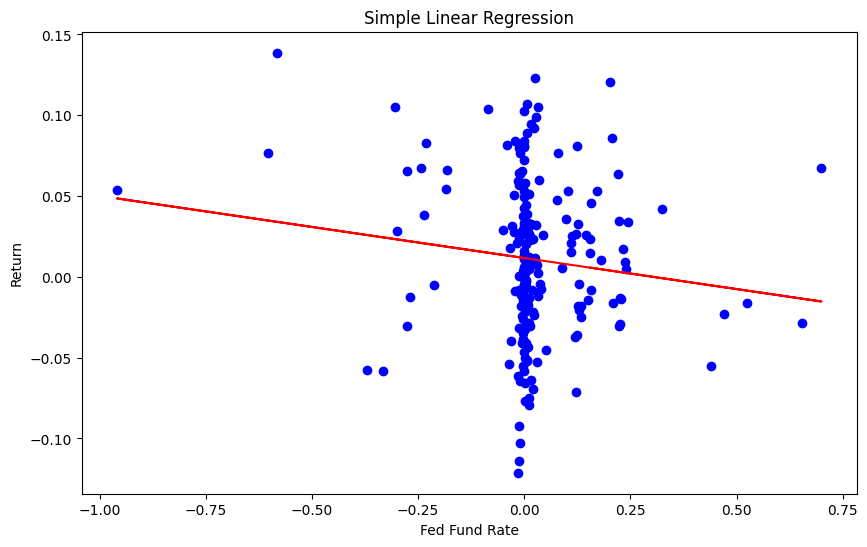

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['DFF_diff'], df['Return'], color='blue', label='Data points')
plt.plot(df['DFF_diff'], result_slr.predict(df['DFF_diff']), color='red', label='Regression line')

plt.xlabel('Fed Fund Rate')
plt.ylabel('Return')
plt.title('Simple Linear Regression')

plt.savefig('SLR.png')
plt.show()

In [17]:
from statsmodels.tsa.api import VAR
var = VAR(df[['Return', 'DFF_diff']])
result_var = var.fit(maxlags=5, ic='aic')
result_var.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2024
Time:                     15:15:47
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.0806
Nobs:                     202.000    HQIC:                  -10.2172
Log likelihood:           482.052    FPE:                3.33026e-05
AIC:                     -10.3099    Det(Omega_mle):     3.11092e-05
--------------------------------------------------------------------
Results for equation Return
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.010748         0.003767            2.853           0.004
L1.Return          -0.028824         0.072212           -0.399           0.690
L1.DFF_diff        -0.033511         0.029493           -1.136     

In [18]:
from statsmodels.tsa.vector_ar.vecm import VECM, coint_johansen

result = coint_johansen(df[['Return', 'DFF_diff']], det_order=0, k_ar_diff=3)
print("Eigenvalues:")
print(result.eig)

# 跟踪统计量
print("\nTrace Statistic:")
print(result.lr1)

# 跟踪统计量的临界值
print("\nCritical Values for Trace Statistic:")
print(result.cvt)

# 最大特征根统计量
print("\nMaximum Eigenvalue Statistic:")
print(result.lr2)

# 最大特征根统计量的临界值
print("\nCritical Values for Maximum Eigenvalue Statistic:")
print(result.cvm)

# 特征向量矩阵
print("\nEigenvectors:")
print(result.evec)

Eigenvalues:
[0.17907875 0.05714445]

Trace Statistic:
[51.49022737 11.82728044]

Critical Values for Trace Statistic:
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Maximum Eigenvalue Statistic:
[39.66294694 11.82728044]

Critical Values for Maximum Eigenvalue Statistic:
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]

Eigenvectors:
[[43.56412428  1.53803556]
 [ 1.33614165  7.3838726 ]]


In [19]:
vecm = VECM(df[['Return', 'DFF_diff']], k_ar_diff=3, coint_rank=2)
vecm_fit = vecm.fit()
vecm_fit.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.Return,-0.2542,0.121,-2.108,0.035,-0.491,-0.018
L1.DFF_diff,-0.0429,0.034,-1.250,0.211,-0.110,0.024
L2.Return,-0.2356,0.098,-2.398,0.017,-0.428,-0.043
L2.DFF_diff,-0.0037,0.033,-0.109,0.913,-0.069,0.062
L3.Return,-0.1109,0.070,-1.576,0.115,-0.249,0.027
L3.DFF_diff,-0.0044,0.030,-0.147,0.883,-0.063,0.054
,coef,std err,z,P>|z|,[0.025,0.975]
L1.Return,0.1302,0.283,0.460,0.645,-0.424,0.684
L1.DFF_diff,-0.3510,0.081,-4.359,0.000,-0.509,-0.193
L2.Return,-0.0793,0.230,-0.344,0.730,-0.531,0.372


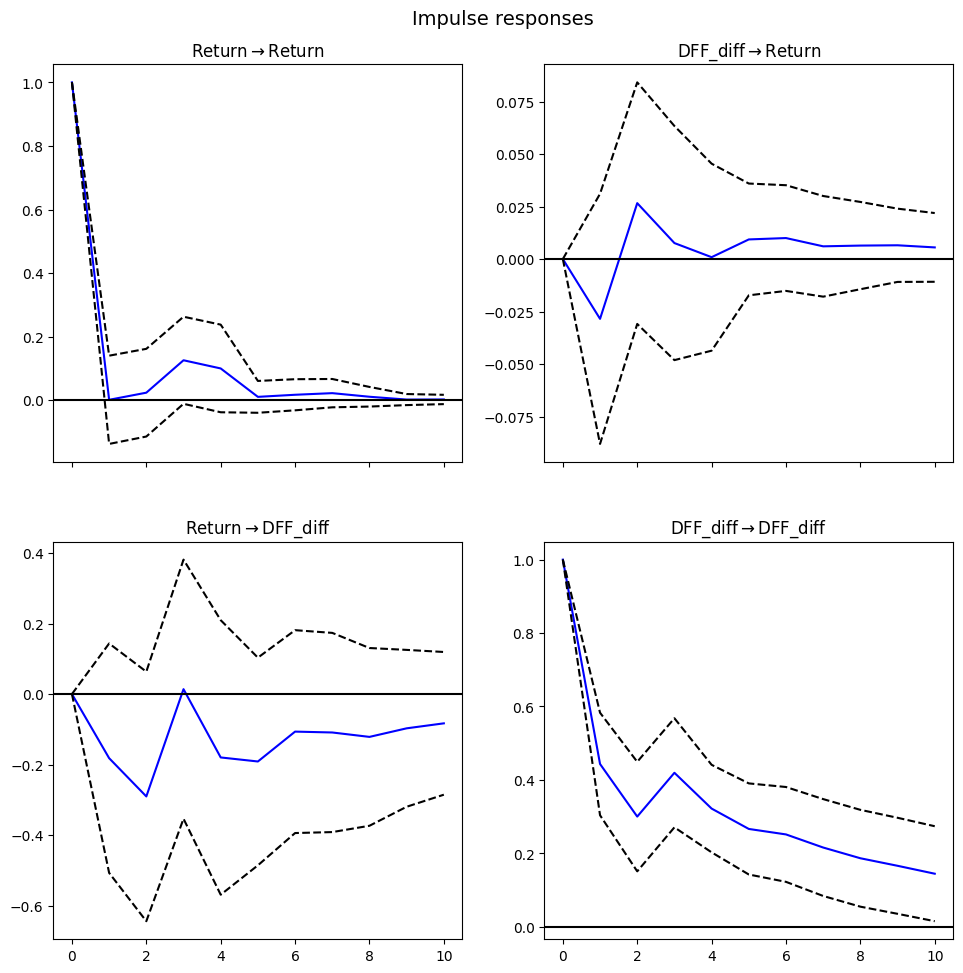

In [20]:
irf = vecm_fit.irf(10)
irf.plot(orth=False)
plt.savefig('Impulse Responses.png')
plt.show()

In [21]:
dff = pd.read_csv("DFF.csv")
dff['DATE'] = pd.to_datetime(dff['DATE'])

cpi = pd.read_csv("USCPI.csv")
cpi['DATE'] = pd.to_datetime(cpi['DATE'])
cpi

,DATE,CPIAUCSL_PC1
0,2004-07-01,2.93958
1,2004-08-01,2.54743
2,2004-09-01,2.53917
3,2004-10-01,3.19091
4,2004-11-01,3.62162
...,...,...
236,2024-03-01,3.47513
237,2024-04-01,3.35773
238,2024-05-01,3.25021
239,2024-06-01,2.97563


In [22]:
cpi.rename(columns={'CPIAUCSL_PC1':'CPI'},inplace=True)
real_rate = pd.merge(dff, cpi, on='DATE', how='inner')
real_rate['Real Interest Rate'] = real_rate['DFF'] - real_rate['CPI']
real_rate

,DATE,DFF,CPI,Real Interest Rate
0,2004-08-01,1.429355,2.54743,-1.118075
1,2004-09-01,1.605000,2.53917,-0.934170
2,2004-10-01,1.760968,3.19091,-1.429942
3,2004-11-01,1.932000,3.62162,-1.689620
4,2004-12-01,2.156129,3.34232,-1.186191
...,...,...,...,...
235,2024-03-01,5.330000,3.47513,1.854870
236,2024-04-01,5.330000,3.35773,1.972270
237,2024-05-01,5.330000,3.25021,2.079790
238,2024-06-01,5.330000,2.97563,2.354370


In [23]:
df2 = pd.merge(real_rate, gold_r, on='DATE', how='right')
df2.dropna(inplace=True)
df2.to_csv('Real Interest Rate vs Gold Price.csv')
df2

,DATE,DFF,CPI,Real Interest Rate,Close,Return
1,2004-10-01,1.760968,3.19091,-1.429942,428.500000,0.023406
2,2004-11-01,1.932000,3.62162,-1.689620,451.299988,0.053209
3,2004-12-01,2.156129,3.34232,-1.186191,437.500000,-0.030578
4,2005-01-01,2.279355,2.84487,-0.565515,421.799988,-0.035886
5,2005-02-01,2.501786,3.05303,-0.551244,436.500000,0.034851
...,...,...,...,...,...,...
201,2024-03-01,5.330000,3.47513,1.854870,2217.399902,0.083932
202,2024-04-01,5.330000,3.35773,1.972270,2291.399902,0.033372
203,2024-05-01,5.330000,3.25021,2.079790,2322.899902,0.013747
204,2024-06-01,5.330000,2.97563,2.354370,2327.699951,0.002066


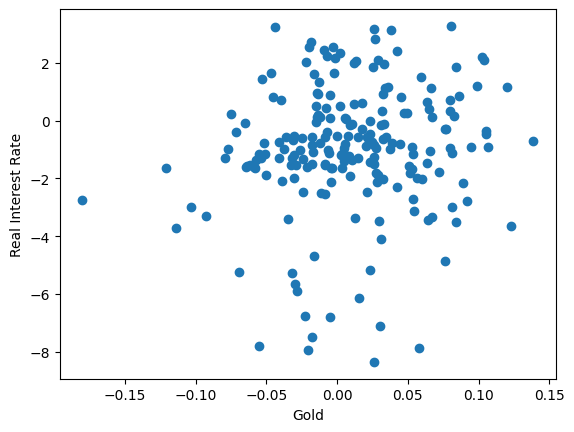

In [24]:
plt.xlabel('Gold')
plt.ylabel('Real Interest Rate')
plt.scatter(df2['Return'],df2['Real Interest Rate'])
plt.savefig('Real Interest Rate and Gold Price.png')

In [25]:
df2[df2['Return'] < -0.15]

,DATE,DFF,CPI,Real Interest Rate,Close,Return
43,2008-10-01,0.969355,3.73106,-2.761705,716.799988,-0.18005


In [26]:
df2.drop(df2[df2['Return'] < -0.15].index, inplace=True)

C:\Users\jason wang\AppData\Local\Temp\ipykernel_14964\2483358596.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date = pd.date_range(start = '2004', periods = len(df2), freq = 'M') # To demonstrate date by year


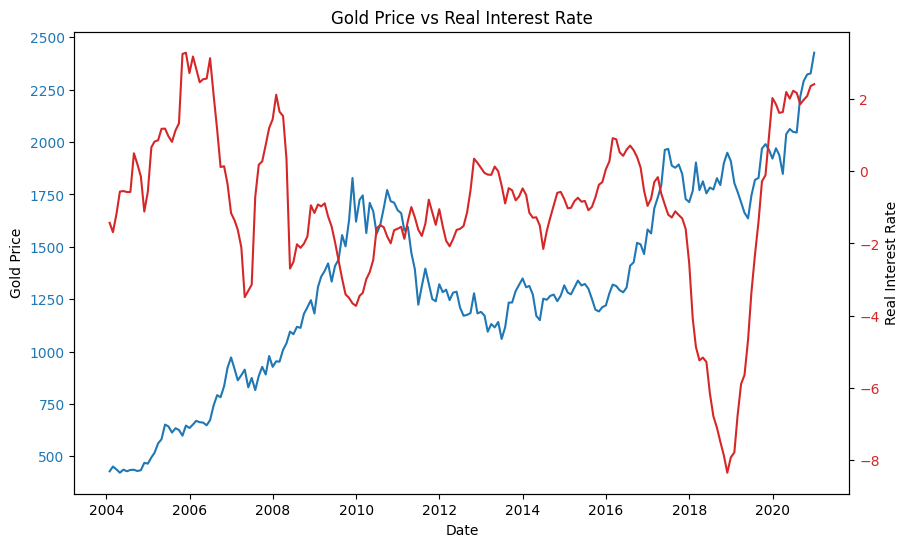

In [27]:
date = pd.date_range(start = '2004', periods = len(df2), freq = 'M') # To demonstrate date by year

fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:blue'
ax1.plot(date, df2['Close'],color=color)
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(date, df2['Real Interest Rate'],color=color)
ax2.set_ylabel('Real Interest Rate')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Gold Price vs Real Interest Rate')
plt.savefig('Gold Price vs Real Interest Rate.png')

plt.show()

In [28]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
def ad_full(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    print(dfoutput)
ad_full(df2['Real Interest Rate'])

Test Statistic                  -2.559184
p-value                          0.101730
Lags Used                        1.000000
Number of Observations Used    202.000000
dtype: float64


In [41]:
real_rate['RIR_diff'] = np.append(np.nan, np.diff(real_rate['Real Interest Rate']))
real_rate['DFF_diff'] = np.append(np.nan, np.diff(real_rate['DFF']))
real_rate['CPI_diff'] = np.append(np.nan, np.diff(real_rate['CPI']))
df2['Date'] = pd.to_datetime(df2['DATE'])
df2 = pd.merge(df2, real_rate, on=['DATE', 'DFF', 'CPI','Real Interest Rate'], how='left')
df2.to_csv('Real Interest Rate vs Gold Price.csv')
df2

,DATE,DFF,CPI,Real Interest Rate,Close,Return,Date,RIR_diff,DFF_diff,CPI_diff
0,2004-10-01,1.760968,3.19091,-1.429942,428.500000,0.023406,2004-10-01,-0.495772,0.155968,0.65174
1,2004-11-01,1.932000,3.62162,-1.689620,451.299988,0.053209,2004-11-01,-0.259678,0.171032,0.43071
2,2004-12-01,2.156129,3.34232,-1.186191,437.500000,-0.030578,2004-12-01,0.503429,0.224129,-0.27930
3,2005-01-01,2.279355,2.84487,-0.565515,421.799988,-0.035886,2005-01-01,0.620676,0.123226,-0.49745
4,2005-02-01,2.501786,3.05303,-0.551244,436.500000,0.034851,2005-02-01,0.014271,0.222431,0.20816
...,...,...,...,...,...,...,...,...,...,...
199,2024-03-01,5.330000,3.47513,1.854870,2217.399902,0.083932,2024-03-01,-0.309390,0.000000,0.30939
200,2024-04-01,5.330000,3.35773,1.972270,2291.399902,0.033372,2024-04-01,0.117400,0.000000,-0.11740
201,2024-05-01,5.330000,3.25021,2.079790,2322.899902,0.013747,2024-05-01,0.107520,0.000000,-0.10752
202,2024-06-01,5.330000,2.97563,2.354370,2327.699951,0.002066,2024-06-01,0.274580,0.000000,-0.27458


In [75]:
ad_full(df2['RIR_diff'])

Test Statistic                -8.937782e+00
p-value                        9.431306e-15
Lags Used                      0.000000e+00
Number of Observations Used    2.030000e+02
dtype: float64


In [76]:
import statsmodels.formula.api as smf
reg = smf.ols(formula='Return ~ RIR_diff', data=df2)
result_slr=reg.fit()
result_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04137
Date:                Tue, 03 Sep 2024   Prob (F-statistic):              0.839
Time:                        18:02:00   Log-Likelihood:                 328.94
No. Observations:                 204   AIC:                            -653.9
Df Residuals:                     202   BIC:                            -647.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0108      0.003      3.168      0.002       0.004       0.017
RIR_diff       0.0014      0.007      0.203      0.839      -0.012       0.015
==============================================================================
Omnibus:                        0.298   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.439
Skew:                           0.063   Prob(JB):                        0.803
Kurtosis:                       2.812   Cond. No.                         2.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

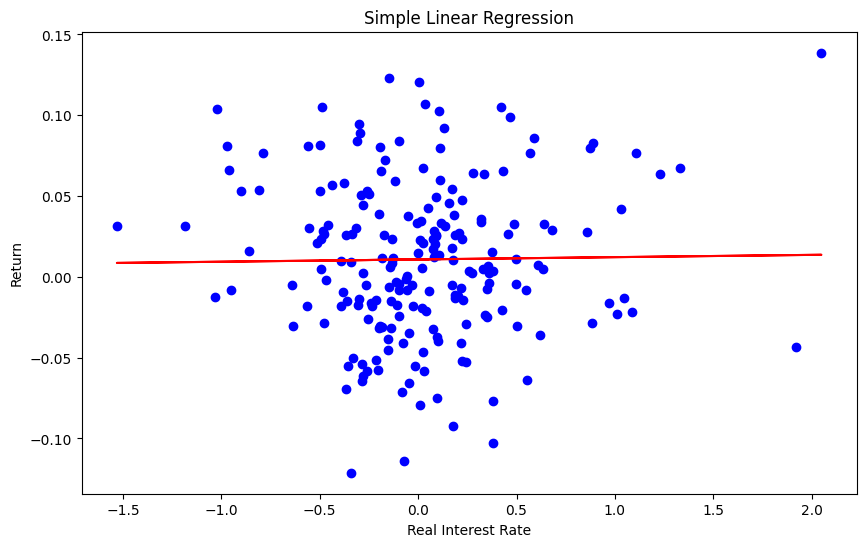

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['RIR_diff'], df2['Return'], color='blue', label='Data points')
plt.plot(df2['RIR_diff'], result_slr.predict(df2['RIR_diff']), color='red', label='Regression line')

plt.xlabel('Real Interest Rate')
plt.ylabel('Return')
plt.title('Simple Linear Regression')

plt.savefig('SLR2.png')
plt.show()

In [62]:
from statsmodels.tsa.api import VAR
var = VAR(df2[['Return', 'RIR_diff']])
result_var = var.fit(maxlags=5, ic='aic')
result_var.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 28, Aug, 2024
Time:                     15:14:05
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -7.54516
Nobs:                     203.000    HQIC:                  -7.60347
Log likelihood:           205.684    FPE:                0.000479348
AIC:                     -7.64309    Det(Omega_mle):     0.000465488
--------------------------------------------------------------------
Results for equation Return
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.010949         0.003501            3.128           0.002
L1.Return          -0.025346         0.070735           -0.358           0.720
L1.RIR_diff         0.002540         0.006971            0.364     

In [64]:
from statsmodels.tsa.vector_ar.vecm import VECM, coint_johansen

result = coint_johansen(df2[['Return', 'RIR_diff']], det_order=0, k_ar_diff=1)
print("Eigenvalues:")
print(result.eig)

# 跟踪统计量
print("\nTrace Statistic:")
print(result.lr1)

# 跟踪统计量的临界值
print("\nCritical Values for Trace Statistic:")
print(result.cvt)

# 最大特征根统计量
print("\nMaximum Eigenvalue Statistic:")
print(result.lr2)

# 最大特征根统计量的临界值
print("\nCritical Values for Maximum Eigenvalue Statistic:")
print(result.cvm)

# 特征向量矩阵
print("\nEigenvectors:")
print(result.evec)

Eigenvalues:
[0.35720757 0.2209649 ]

Trace Statistic:
[139.70978564  50.43923429]

Critical Values for Trace Statistic:
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Maximum Eigenvalue Statistic:
[89.27055134 50.43923429]

Critical Values for Maximum Eigenvalue Statistic:
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]

Eigenvectors:
[[29.41537352  3.17705917]
 [-0.27514744  2.3907245 ]]


In [65]:
vecm = VECM(df2[['Return', 'RIR_diff']], k_ar_diff=1, coint_rank=2)
vecm_fit = vecm.fit()
vecm_fit.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.Return,-0.0129,0.070,-0.183,0.855,-0.151,0.125
L1.RIR_diff,-0.0030,0.008,-0.375,0.707,-0.018,0.012
,coef,std err,z,P>|z|,[0.025,0.975]
L1.Return,-0.5152,0.626,-0.823,0.410,-1.741,0.711
L1.RIR_diff,0.0030,0.070,0.042,0.966,-0.134,0.140
,coef,std err,z,P>|z|,[0.025,0.975]
ec1,-0.9686,0.098,-9.862,0.000,-1.161,-0.776
ec2,0.0055,0.008,0.653,0.514,-0.011,0.022
,coef,std err,z,P>|z|,[0.025,0.975]
ec1,0.1407,0.875,0.161,0.872,-1.574,1.855


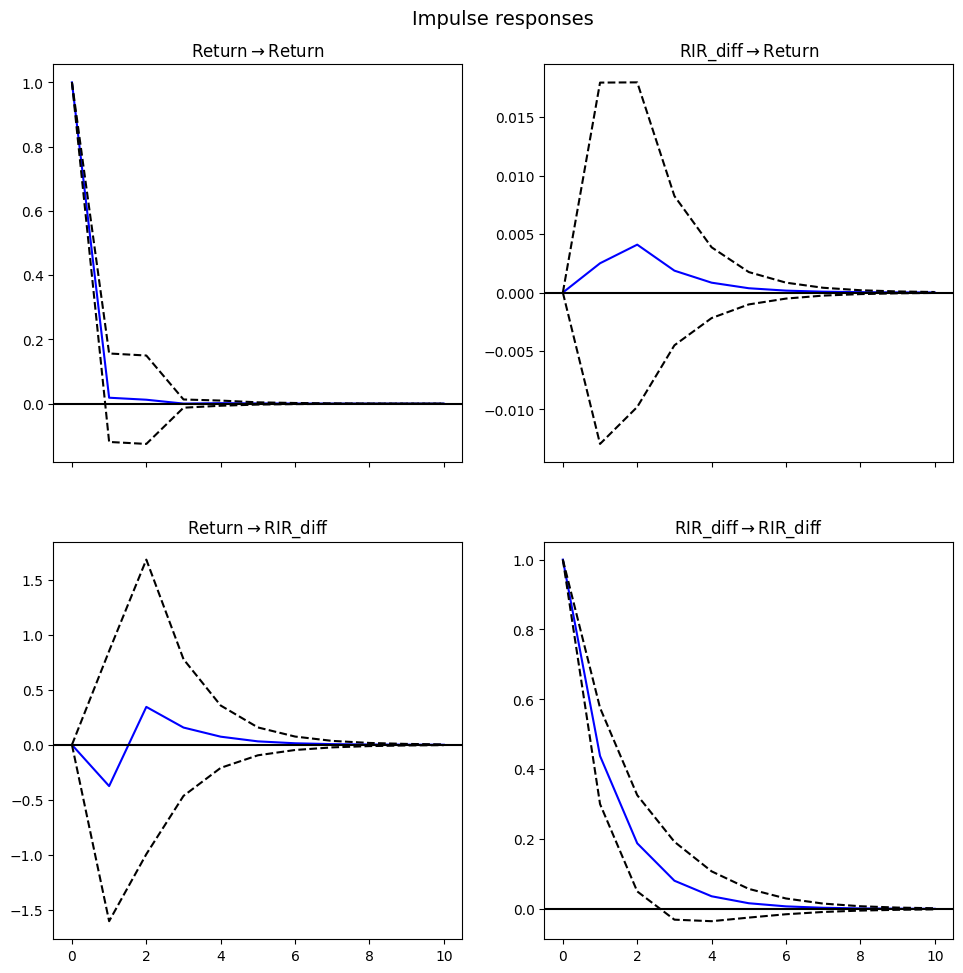

In [70]:
irf = vecm_fit.irf(10)
irf.plot(orth=False)

plt.savefig('Impulse Responses 2.png')
plt.show()

In [2]:
df = pd.read_csv('Real Interest Rate vs Gold Price.csv')

In [4]:
import statsmodels.formula.api as smf
reg = smf.ols(formula='Return ~ CPI_diff', data=df)
result_slr=reg.fit()
result_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7012
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.403
Time:                        16:50:25   Log-Likelihood:                 329.27
No. Observations:                 204   AIC:                            -654.5
Df Residuals:                     202   BIC:                            -647.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0108      0.003      3.188      0.002       0.004       0.017
CPI_diff      -0.0060      0.007     -0.837      0.403      -0.020       0.008
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.487
Skew:                           0.041   Prob(JB):                        0.784
Kurtosis:                       2.775   Cond. No.                         2.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

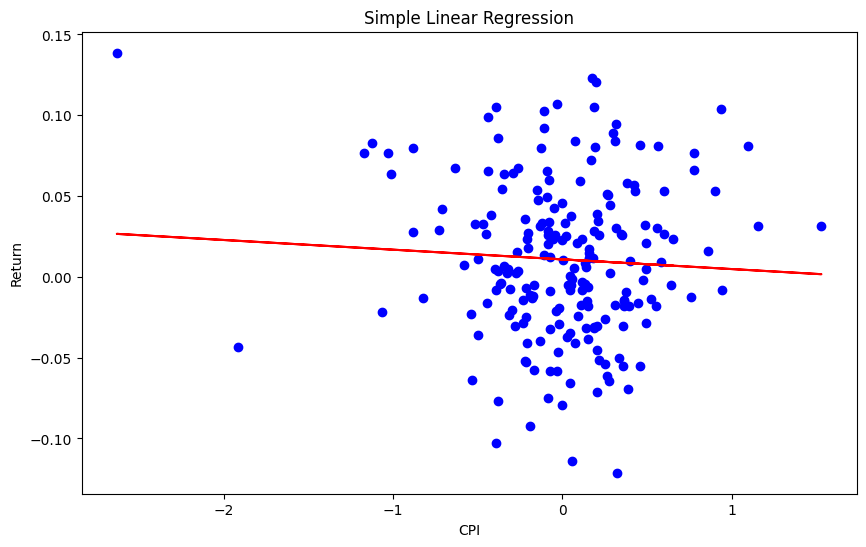

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['CPI_diff'], df['Return'], color='blue', label='Data points')
plt.plot(df['CPI_diff'], result_slr.predict(df['CPI_diff']), color='red', label='Regression line')

plt.xlabel('CPI')
plt.ylabel('Return')
plt.title('Simple Linear Regression')

plt.savefig('SLRCPI.png')
plt.show()

In [6]:
import statsmodels.formula.api as smf
reg = smf.ols(formula='Return ~ CPI_diff + DFF_diff', data=df)
result_slr=reg.fit()
result_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.951
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.145
Time:                        16:52:21   Log-Likelihood:                 330.88
No. Observations:                 204   AIC:                            -655.8
Df Residuals:                     201   BIC:                            -645.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0116      0.003      3.403      0.001       0.005       0.018
CPI_diff      -0.0051      0.007     -0.713      0.477      -0.019       0.009
DFF_diff      -0.0373      0.021     -1.787      0.075      -0.078       0.004
==============================================================================
Omnibus:                        0.090   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.956   Jarque-Bera (JB):                0.223
Skew:                          -0.019   Prob(JB):                        0.895
Kurtosis:                       2.842   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
reg1 = smf.ols(formula='DFF_diff ~ CPI_diff', data=df)
result_slr1=reg1.fit()
result_slr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DFF_diff   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.019
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.314
Time:                        17:07:28   Log-Likelihood:                 82.546
No. Observations:                 204   AIC:                            -161.1
Df Residuals:                     202   BIC:                            -154.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0202      0.011      1.780      0.077      -0.002       0.043
CPI_diff       0.0242      0.024      1.010      0.314      -0.023       0.072
==============================================================================
Omnibus:                       60.653   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              868.268
Skew:                          -0.632   Prob(JB):                    2.87e-189
Kurtosis:                      13.028   Cond. No.                         2.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df['cpi_dff_res'] = result_slr1.resid

In [17]:
reg2 = smf.ols(formula='Return ~ cpi_dff_res + CPI_diff', data=df)
result_slr2=reg2.fit()
result_slr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.951
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.145
Time:                        17:07:33   Log-Likelihood:                 330.88
No. Observations:                 204   AIC:                            -655.8
Df Residuals:                     201   BIC:                            -645.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0108      0.003      3.205      0.002       0.004       0.017
cpi_dff_res    -0.0373      0.021     -1.787      0.075      -0.078       0.004
CPI_diff       -0.0060      0.007     -0.842      0.401      -0.020       0.008
==============================================================================
Omnibus:                        0.090   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.956   Jarque-Bera (JB):                0.223
Skew:                          -0.019   Prob(JB):                        0.895
Kurtosis:                       2.842   Cond. No.                         6.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""